In [1]:
import numpy as np
import matplotlib.pyplot as plt
import json
import seaborn as sns

In [2]:
with open("./shap_os5_bayes_remote/mlp_all.json", "r") as file:
    shap_value = json.load(file)

In [4]:
data1 = np.array(shap_value["her2_zero"])
data2 = np.array(shap_value["her2_low"])
data3 = np.array(shap_value["her2_pos"])

def cal(data):
    # 计算平均数
    mean = np.mean(data)

    # 计算方差
    variance = np.var(data)

    # 计算四分位点
    # 使用分位函数分别计算第1和第3个四分位数
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)

    print(f"Mean: {mean}")
    print(f"Variance: {variance}")
    print(f"Q1: {q1}, Q3: {q3}")

cal(data2)

Mean: 0.001133958999301162
Variance: 3.8540091341101683e-07
Q1: 0.0007316921774431606, Q3: 0.00138724783021579


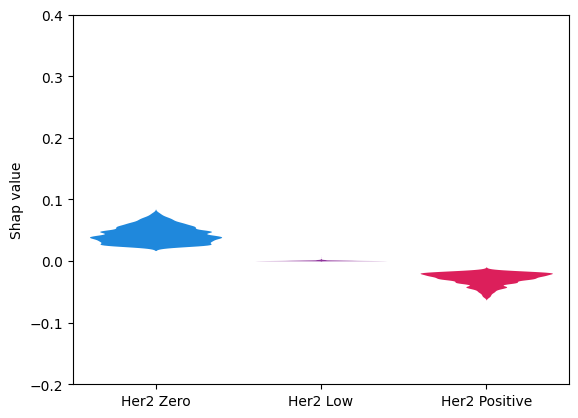

In [5]:
# 创建示例数据
np.random.seed(0)
data1 = np.array(shap_value["her2_zero"])
data2 = np.array(shap_value["her2_low"])
data3 = np.array(shap_value["her2_pos"])

# # 绘制箱型图
# plt.boxplot([data1, data2, data3], labels=['Her2 Zero', 'Her2 Low', 'Her2 Postive'], showfliers=False)

# # 获取每组数据的统计值
# descriptions = [np.round(np.percentile(data, [25, 50, 75]), 2) for data in [data1, data2, data3]]

# # 添加箱线图中的数值
# for i, desc in enumerate(descriptions):
#     plt.text(i + 1, desc[0], f"{desc[0]:.2f}", ha='left', va='bottom')  # Q1
#     plt.text(i + 1, desc[1], f"{desc[1]:.2f}", ha='left', va='bottom')  # median
#     plt.text(i + 1, desc[2], f"{desc[2]:.2f}", ha='left', va='bottom')  # Q3

# 转换数据为适合绘制小提琴图的格式
data_dict = {'Her2 Zero': data1, 'Her2 Low': data2, 'Her2 Positive': data3}
colors = ['#008BFB', '#9C23AD','#FB0050']
# 绘制小提琴图
sns.violinplot(data=data_dict, inner=None, palette=colors, linewidth=0)

# 添加标题和标签
# plt.title('Shap Value of Her2 Status on CHLP Cohort (All Patients)')
plt.ylabel('Shap value')
plt.ylim(-0.2, 0.4)
# plt.gca().spines['top'].set_visible(False)  # 关闭顶部边界框
# plt.gca().spines['right'].set_visible(False)  # 关闭右侧边界框
# plt.gca().spines['bottom'].set_visible(False)  # 关闭底部边界框
# plt.gca().spines['left'].set_visible(False)  # 关闭左侧边界框
# 显示图像
plt.show()